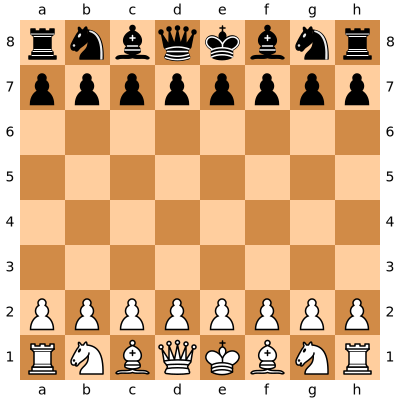

In [1]:
import chess
import chess.svg
import chess.polyglot
from IPython.display import SVG
import chess.pgn
import datetime
import chess.engine

pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 0, 0, 20, 20, 0, 0, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    0, 0, 0, 0, 0, 0, 0, 0]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 5, 0, 0, 0, 0, 5, -10,
    -10, 10, 10, 10, 10, 10, 10, -10,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]

rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    0, 0, 0, 0, 0, 0, 0, 0]

queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]


def evaluate_board():
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0

    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))

    material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)

    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                           for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                             for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)])
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.KING, chess.BLACK)])

    eval = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    if board.turn:
        return eval
    else:
        return -eval


def alphabeta(alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(alpha, beta)
    for move in board.legal_moves:
        board.push(move)
        score = -alphabeta(-beta, -alpha, depthleft - 1)
        board.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

def quiesce( alpha, beta ):
    stand_pat = evaluate_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)
            score = -quiesce( -beta, -alpha )
            board.pop()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score
    return alpha

def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("C:/Users/Ansh Gaikwad/PycharmProjects/ChessWorld/books/varied.bin").weighted_choice(board).move()
        movehistory.append(move)
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -alphabeta(-beta, -alpha, depth-1)
            if boardValue > bestValue:
                bestValue = boardValue;
                bestMove = move
            if( boardValue > alpha ):
                alpha = boardValue
            board.pop()
        movehistory.append(bestMove)
        return bestMove
    
movehistory =[]
board = chess.Board()
SVG(chess.svg.board(board=board,size=400))

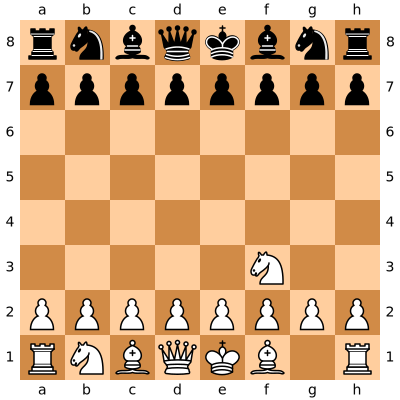

In [2]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

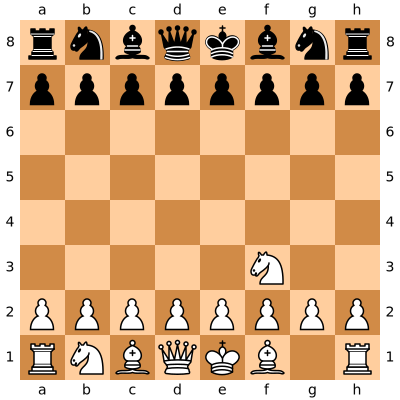

In [2]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

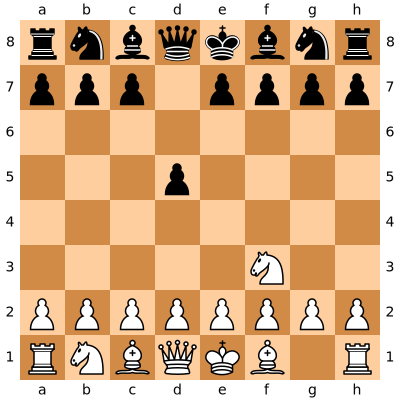

In [3]:
# Human move
board.push_san("d5")
SVG(chess.svg.board(board=board,size=400))


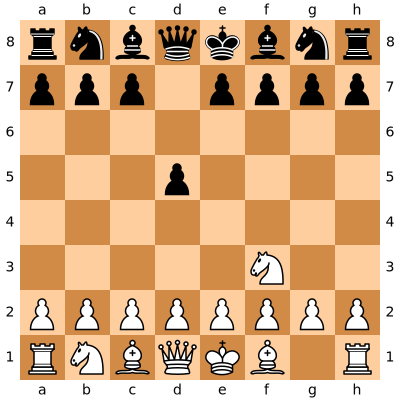

In [3]:
# Human move
board.push_san("d5")
SVG(chess.svg.board(board=board,size=400))

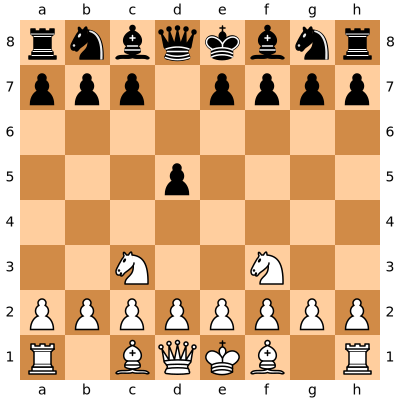

In [4]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

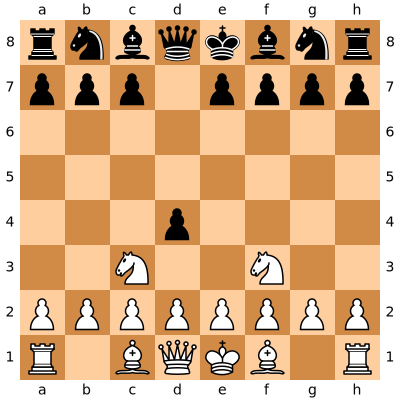

In [5]:
# Human move
board.push_san("d4")
SVG(chess.svg.board(board=board,size=400))

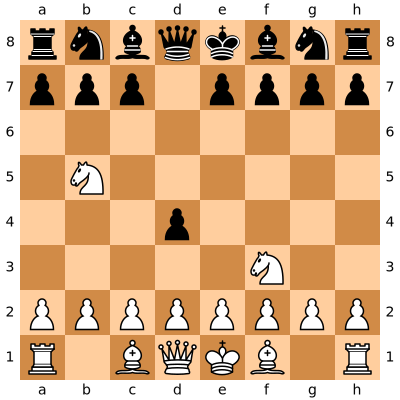

In [6]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

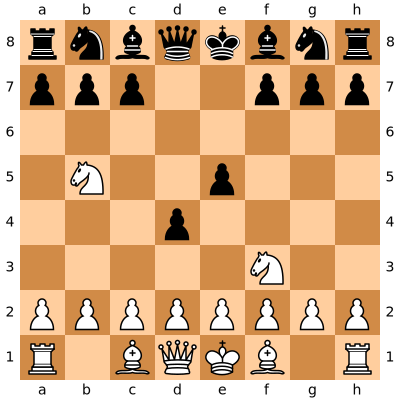

In [7]:
# Human move
board.push_san("e5")
SVG(chess.svg.board(board=board,size=400))

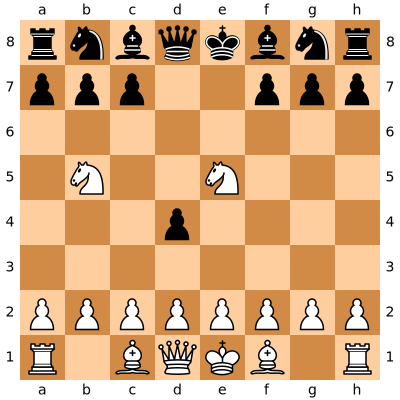

In [8]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

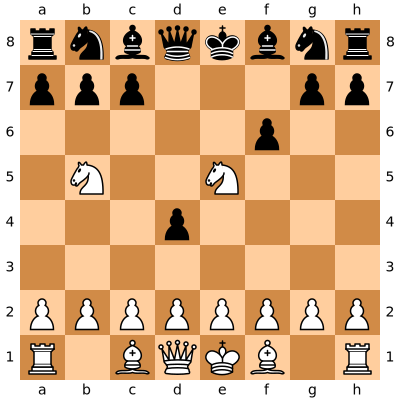

In [9]:
# Human move
board.push_san("f6")
SVG(chess.svg.board(board=board,size=400))

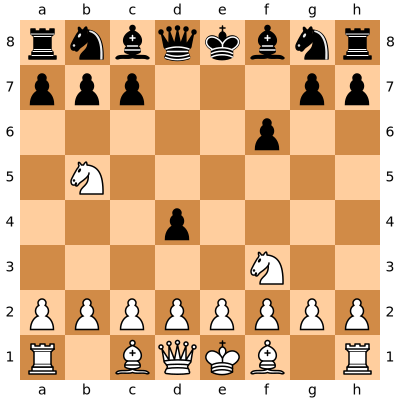

In [10]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

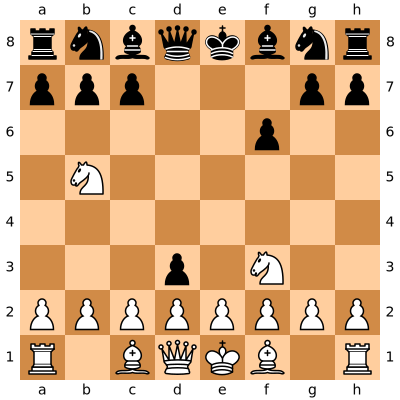

In [11]:
# Human move
board.push_san("d3")
SVG(chess.svg.board(board=board,size=400))

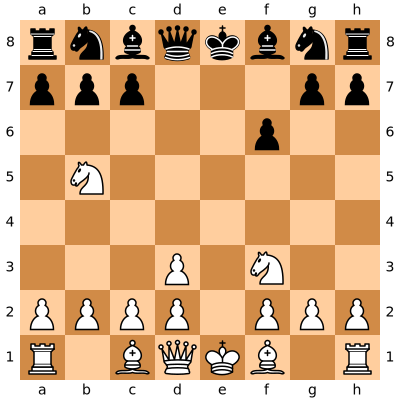

In [12]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

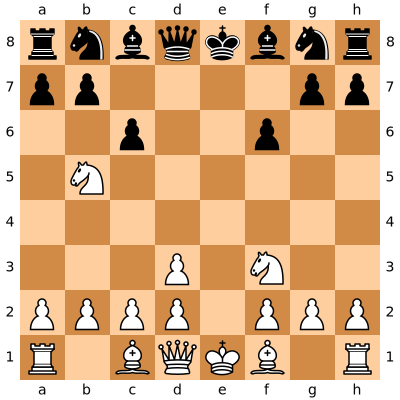

In [13]:
# Human move
board.push_san("c6")
SVG(chess.svg.board(board=board,size=400))

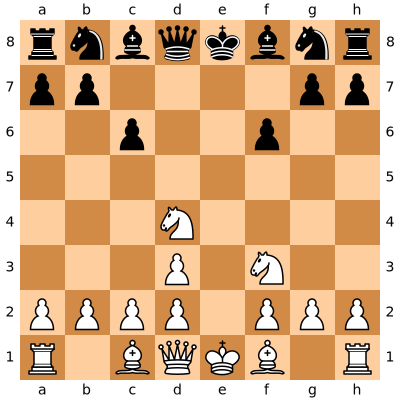

In [14]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

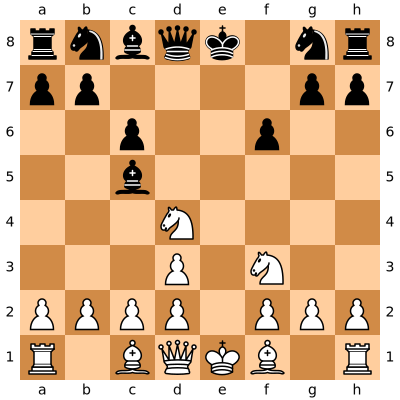

In [15]:
# Human move
board.push_san("Bc5")
SVG(chess.svg.board(board=board,size=400))

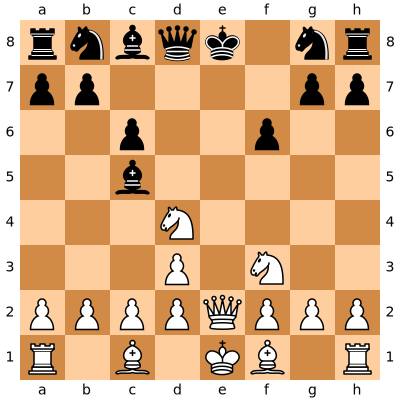

In [16]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

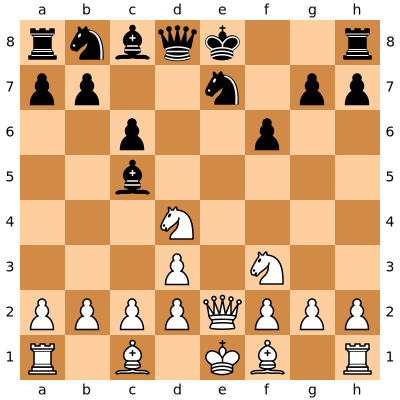

In [17]:
# Human move
board.push_san("Ne7")
SVG(chess.svg.board(board=board,size=400))

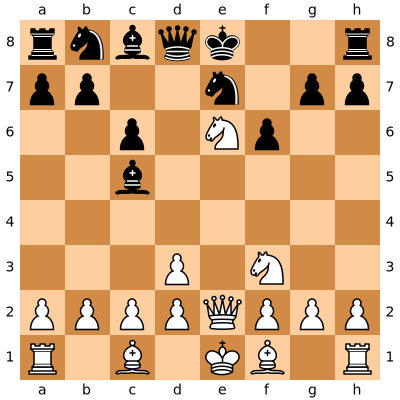

In [18]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

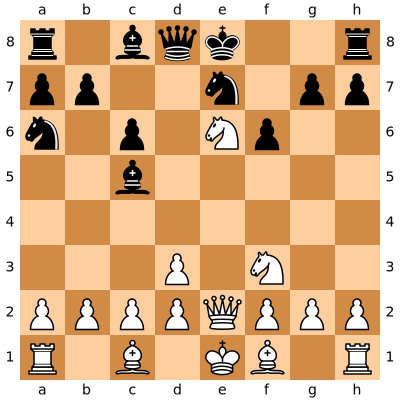

In [19]:
# Human move
board.push_san("Na6")
SVG(chess.svg.board(board=board,size=400))

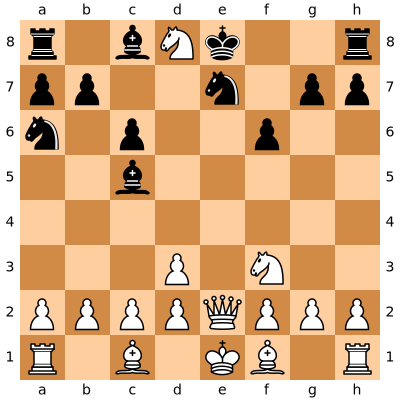

In [20]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

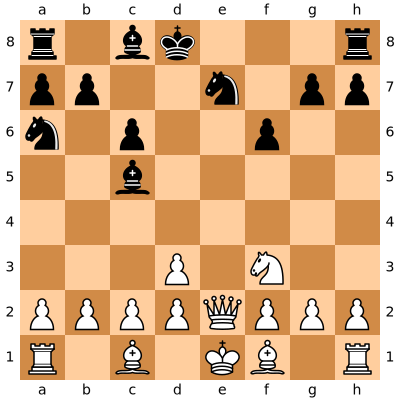

In [21]:
# Human move
board.push_san("Kd8")
SVG(chess.svg.board(board=board,size=400))

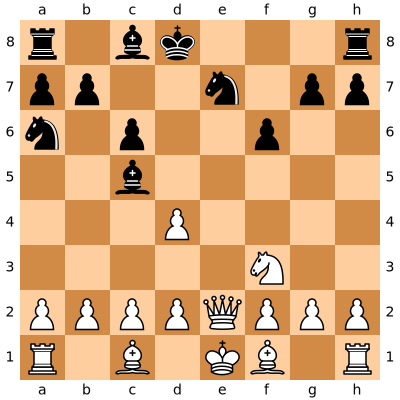

In [22]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

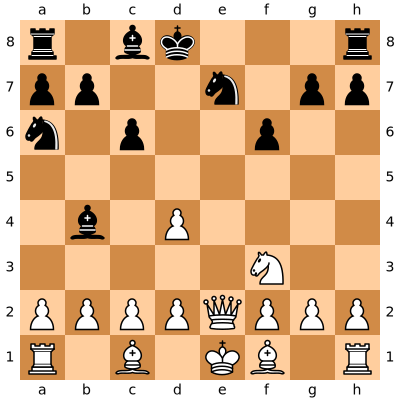

In [23]:
# Human move
board.push_san("Bb4")
SVG(chess.svg.board(board=board,size=400))

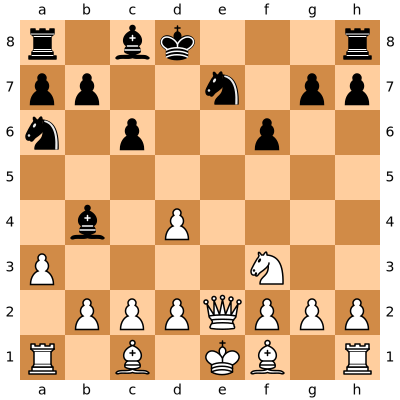

In [24]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

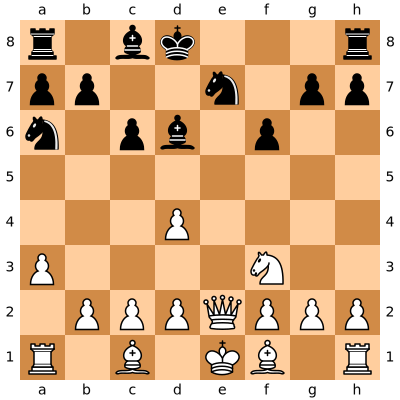

In [25]:
# Human move
board.push_san("Bd6")
SVG(chess.svg.board(board=board,size=400))

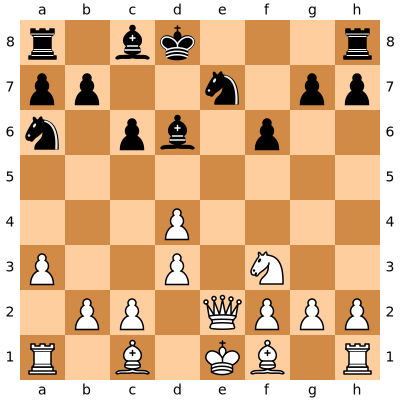

In [26]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

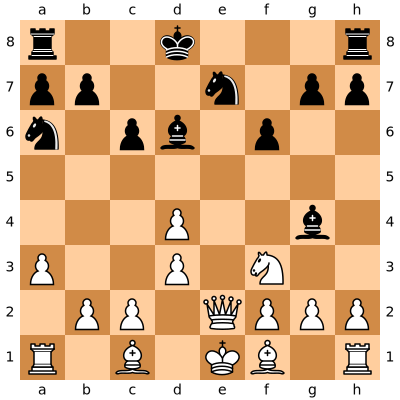

In [27]:
# Human move
board.push_san("Bg4")
SVG(chess.svg.board(board=board,size=400))

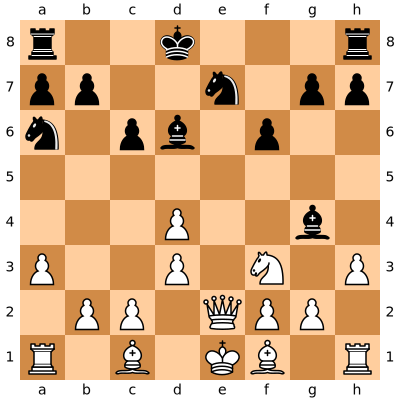

In [28]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

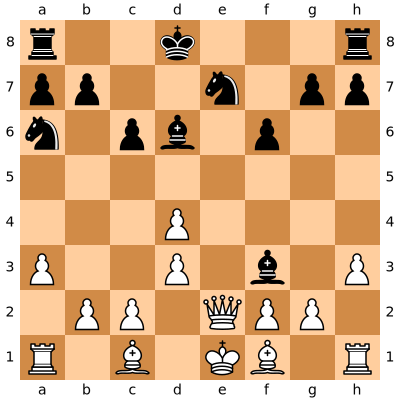

In [29]:
# Human move
board.push_san("Bf3")
SVG(chess.svg.board(board=board,size=400))

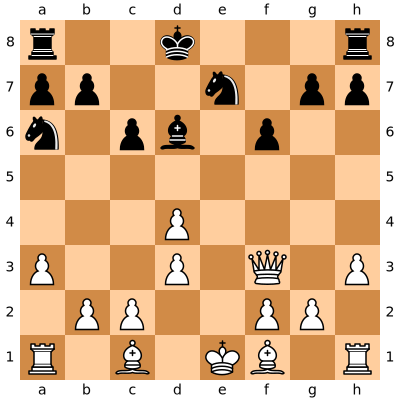

In [30]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

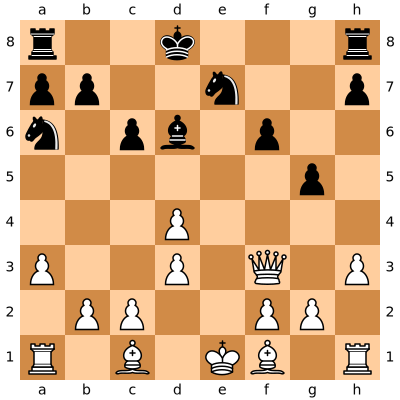

In [31]:
# Human move
board.push_san("g5")
SVG(chess.svg.board(board=board,size=400))

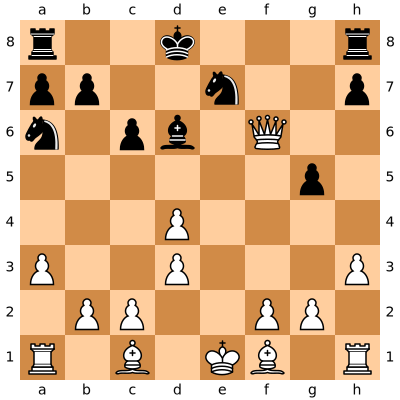

In [32]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

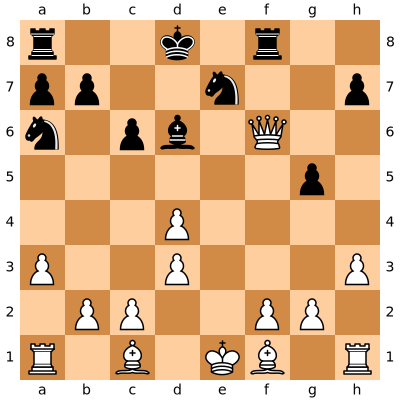

In [34]:
# Human move
board.push_san("Rf8")
SVG(chess.svg.board(board=board,size=400))

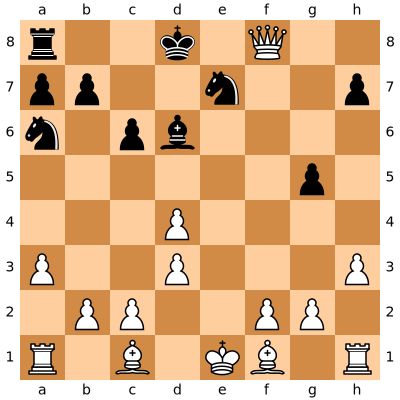

In [35]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

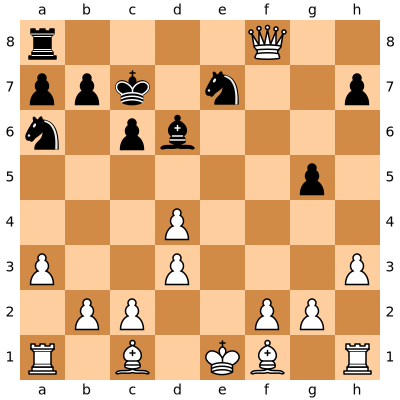

In [36]:
# Human move
board.push_san("Kc7")
SVG(chess.svg.board(board=board,size=400))

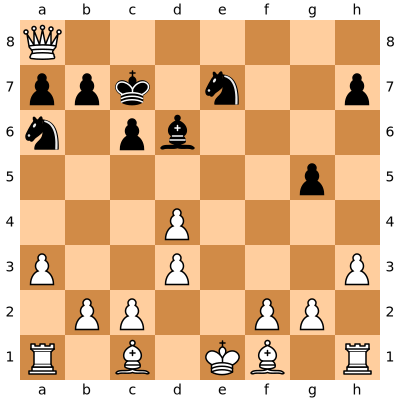

In [37]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

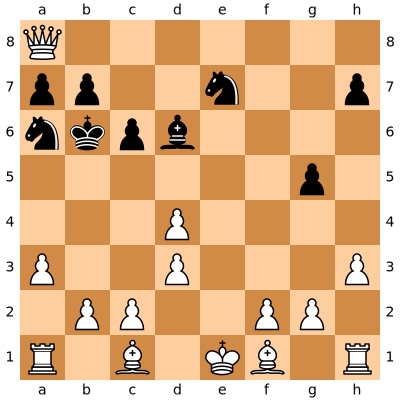

In [38]:
# Human move
board.push_san("Kb6")
SVG(chess.svg.board(board=board,size=400))

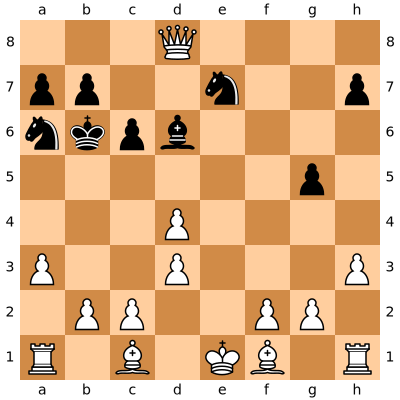

In [39]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

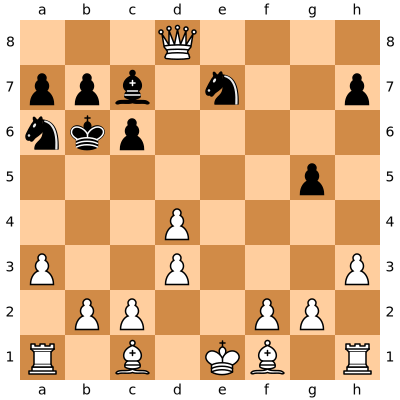

In [40]:
# Human move
board.push_san("Bc7")
SVG(chess.svg.board(board=board,size=400))

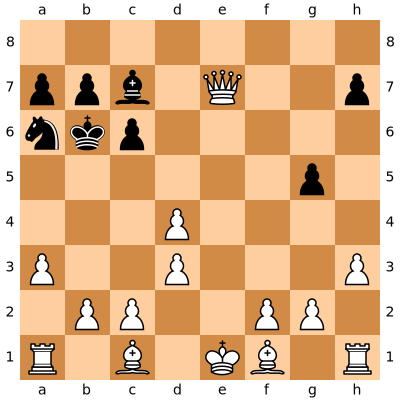

In [41]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

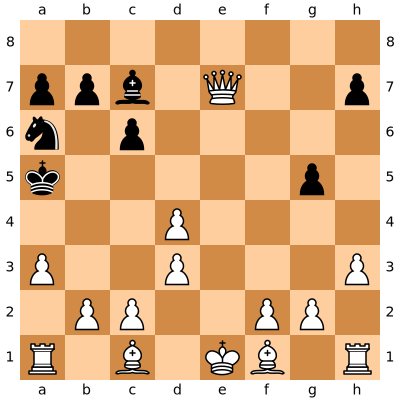

In [42]:
# Human move
board.push_san("Ka5")
SVG(chess.svg.board(board=board,size=400))

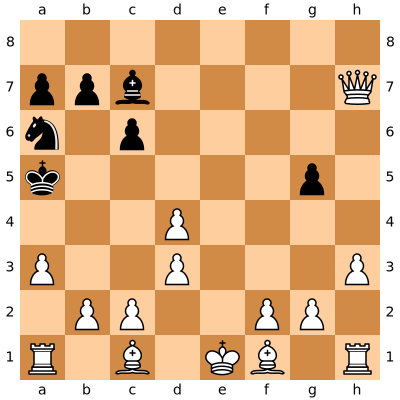

In [43]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

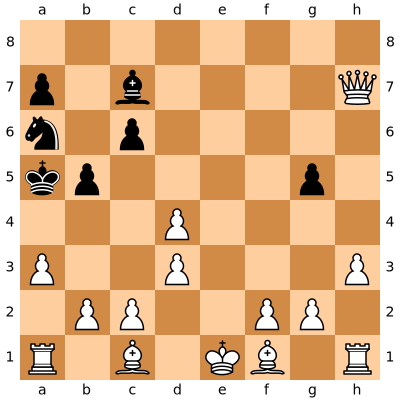

In [44]:
# Human move
board.push_san("b5")
SVG(chess.svg.board(board=board,size=400))

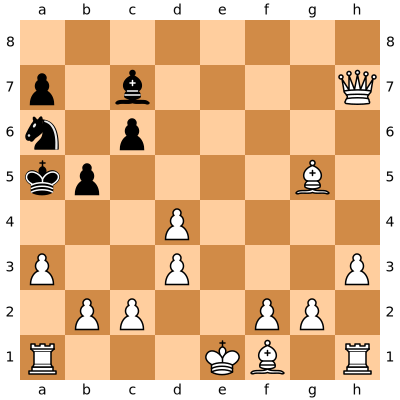

In [45]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

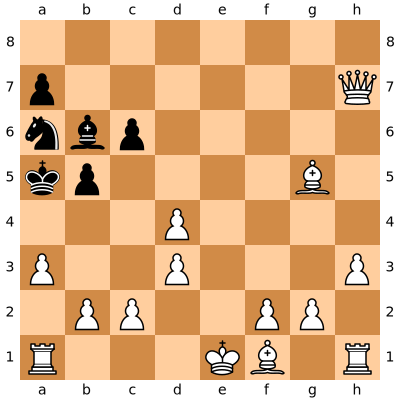

In [46]:
# Human move
board.push_san("Bb6")
SVG(chess.svg.board(board=board,size=400))

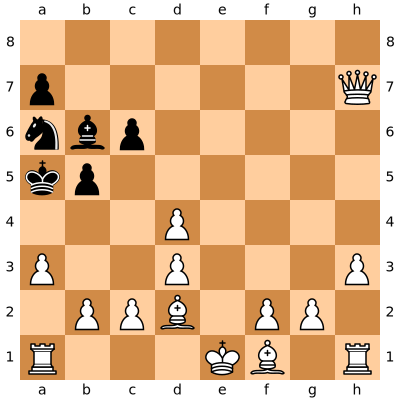

In [47]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

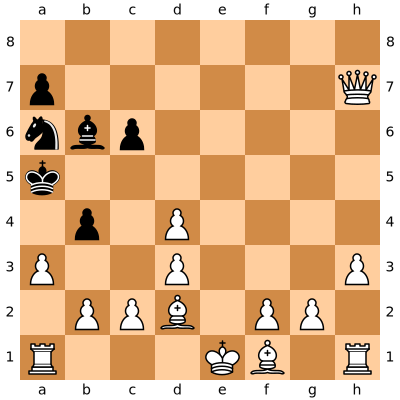

In [48]:
# Human move
board.push_san("b4")
SVG(chess.svg.board(board=board,size=400))

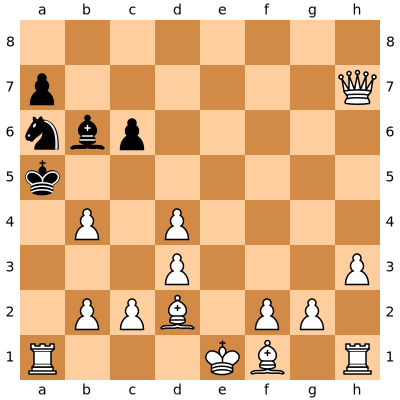

In [49]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

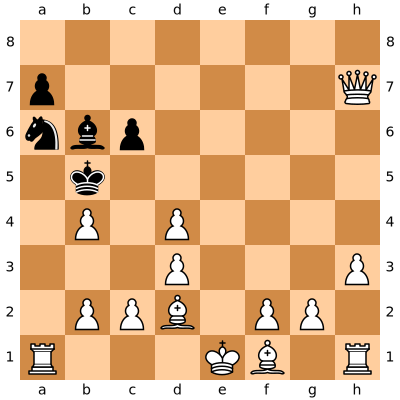

In [51]:
# Human move
board.push_san("Kb5")
SVG(chess.svg.board(board=board,size=400))

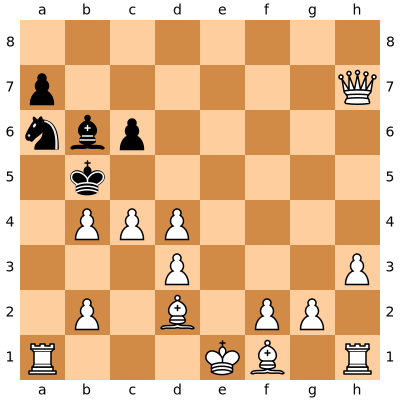

In [52]:
# Making Ai move
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))